# OpenCV fundamentals

This notebook covers opening files, looking at pixels, and some simple image processing techniques.

We'll use the following sample image, stolen from the Internet. But you can use whatever image you like.


## Python getting started

First we need to import the relevant libraries: OpenCV itself, Numpy, and a couple of others. Common and Video are simple data handling and opening routines that you can find in the OpenCV Python Samples directory or from the github repo linked above.  We'll start each notebook with the same includes - you don't need all of them every time (so this is bad form, really) but it's easier to just copy and paste. 

In [10]:


# These imports let you use opencv
import cv2 #opencv itself

import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

Now we can open an image:

In [2]:
input_image=cv2.imread(r"me.jpg")

We can find out various things about that image

In [3]:
print(input_image.size)

36000000


In [4]:
print(input_image.shape)



(4000, 3000, 3)


In [5]:
print(input_image.dtype)

uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

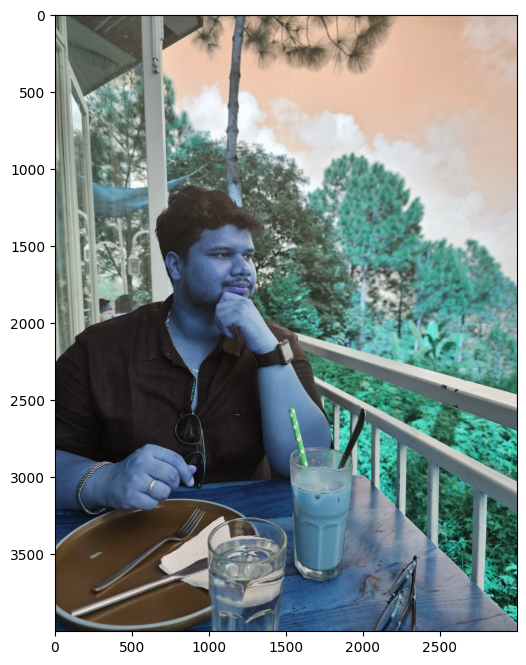

In [11]:
plt.imshow(input_image)
plt.show()

What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

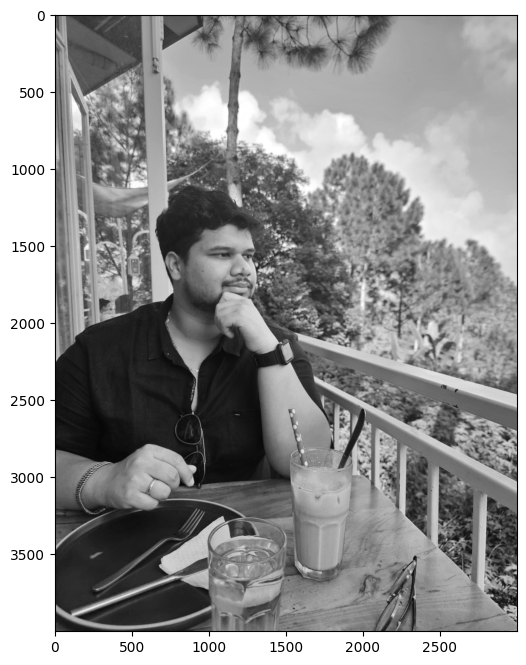

In [12]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')
plt.show()

## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

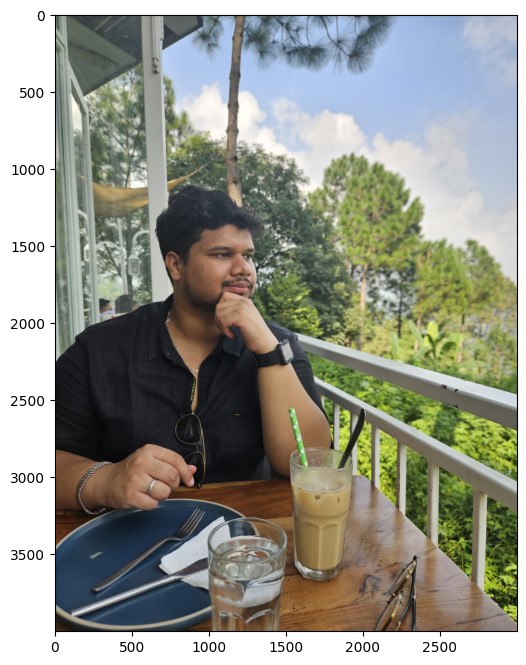

In [14]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)
plt.show()

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done. 

In [15]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

# If you want to see them all, rather than just a count uncomment the following line
#print(COLORflags)

396


In [16]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)


## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [17]:
pixel = input_image[100,100]
print(pixel)

[ 95 109  98]


In [18]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

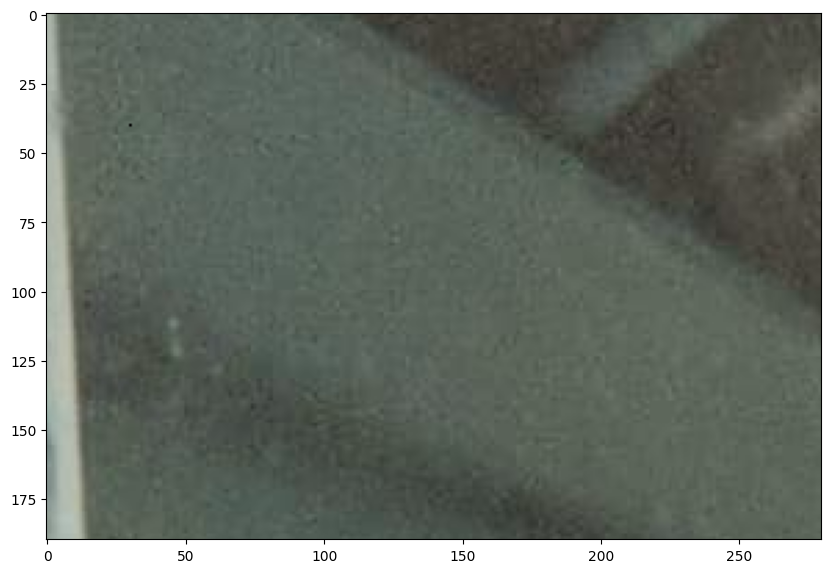

In [20]:
face = input_image[60:250, 70:350]
plt.imshow(face)
plt.show()

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. The getting and setting of regions above uses slicing, though, and I'd like to finish this notebook with a little more detail on what is going on there. 

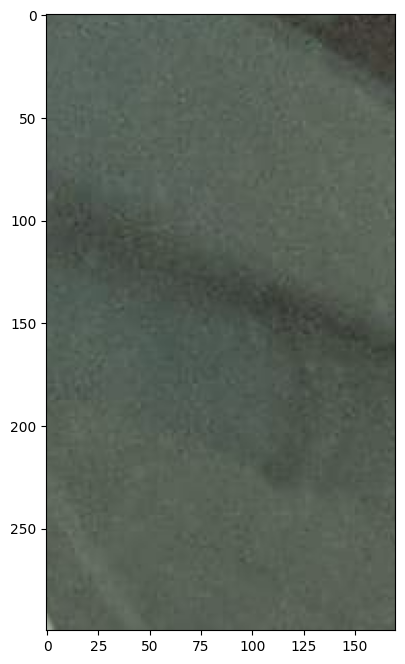

In [23]:
freshim2 = cv2.imread(r"me.jpg")
crop = freshim2[100:400, 130:300] 
plt.imshow(crop)
plt.show()

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as 
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

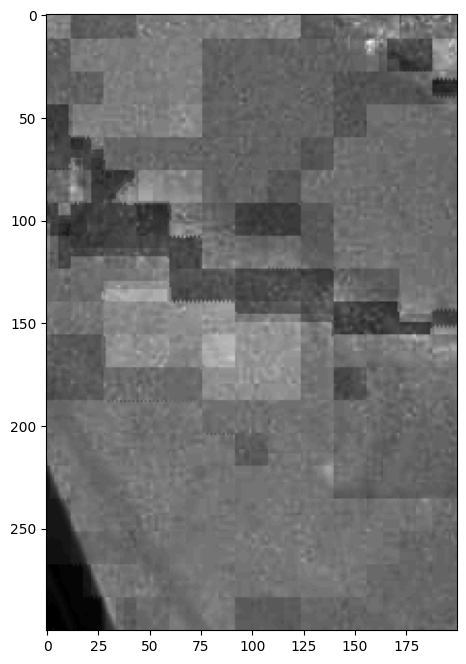

In [25]:
hsvim=cv2.cvtColor(freshim2,cv2.COLOR_BGR2HSV)
bcrop =hsvim[100:400, 100:300, 1]
plt.imshow(bcrop, cmap="gray")
plt.show()

[Next](2-Image_stats_and_image_processing.ipynb)

# Image stats and image processing
This notebook follows on from the fundamentals notebook.

This will introduce some simple stats, smoothing, and basic image processing.

But first let us include what we need to include and load up our test image.

<p>
 Estimated time needed: <strong>20 min</strong>
</p>

In [29]:

# these imports let you use opencv
import cv2 #opencv itself

import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

input_image=cv2.imread(r"me.jpg")

## Basic manipulations

Rotate, flip... 

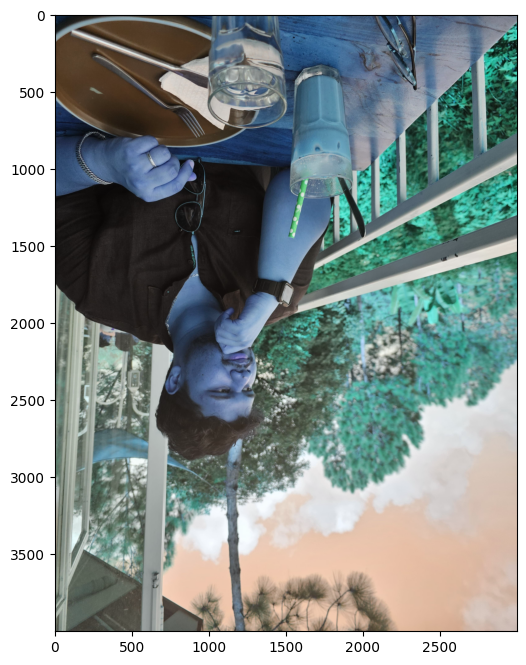

In [30]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)
plt.show()

In [31]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

In [32]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately. 

In [33]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


min 0.0 is at (906, 2359), and max 255.0 is at (1144, 151)
min 0.0 is at (894, 2464), and max 255.0 is at (128, 567)
min 0.0 is at (816, 2608), and max 255.0 is at (1196, 518)


## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size. 

In [34]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

In [35]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

In [36]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))

In [37]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

## Edges

Edge detection is the final image processing technique we're going to look at in this tutorial.

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html). 

In [38]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference


Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

In [39]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

## Features in computer vision

Features are image locations that are "easy" to find in the future.  Indeed, one of the early feature detection techniques Lucas-Kanade, sometimes called Kanade-Lucas-Tomasi or KLT features come from a seminal paper called "Good features to track".

Edges find brightness discontinuities in an image, features find distinctive regions. There are a bunch of different feature detectors and these all have some characteristics in common: they should be quick to find, and things that are close in image-space are close in feature-space (that is, the feature representation of an object looks like the feature representation of objects that look like that object).

There is a more in depth *features in OpenCV* set of tutorials [here](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html) and I'll link to various parts of that as appropriate: for more background though, go and work through the whole thing.

<p>
 Estimated time needed: <strong>20 min</strong>
</p>

In [42]:

# our usual set of includes
# these imports let you use opencv
import cv2 #opencv itself

import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


input_image=cv2.imread(r"me.jpg")

## Corner detectors
If you think of edges as being lines, then corners are an obvious choice for features as they represent the intersection of two lines. One of the earlier corner detectors was introduced by Harris, and it is still a very effective corner detector that gets used quite a lot: it's reliable and it's fast. There's a tutorial explaining how Harris works on the OpenCV site [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

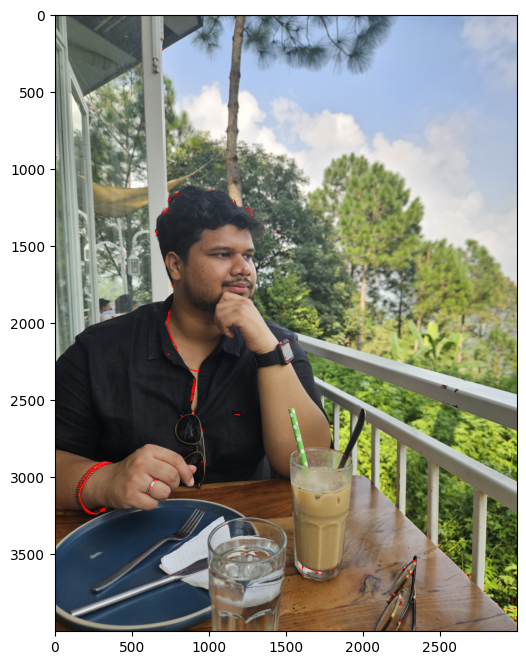

In [46]:
harris_test=input_image.copy()
#greyscale it
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 # 
kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))
plt.show()

Properly speaking the Harris Corner detection is more like a Sobel operator - indeed it is very much like a sobel operator. It doesn't really return a set of features, instead it is a filter which gives a strong response on corner-like regions of the image. We can see this more clearly if we look at the Harris output from the cell above (dst is the Harris response, before thresholding). Well we can kind-of see. You should be able to see that there are slightly light places in the image where there are corner like features, and that there are really light parts of the image around the black and white corners of the writing 

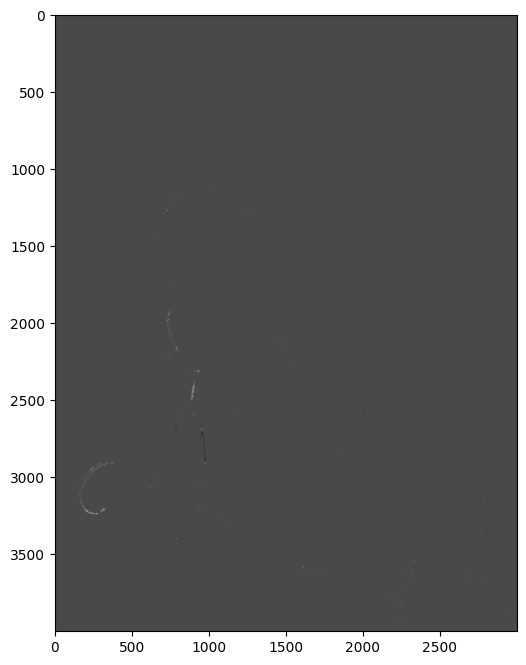

In [47]:
plt.imshow(dst,cmap = 'gray') 
plt.show()

## Moving towards feature space
When we consider modern feature detectors there are a few things we need to mention. What makes a good feature includes the following: 

* Repeatability (got to be able to find it again)
* Distinctiveness/informativeness (features representing different things need to be different)
* Locality (they need to be local to the image feature and not, like, the whole image)
* Quantity (you need to be able to find enough of them for them to be properly useful)
* Accuracy (they need to accurately locate the image feature)
* Efficiency (they've got to be computable in reasonable time)

This comes from a good survey which you can find here (and which I'd thoroughly recommend reading if you're doing feature detection work) [here](https://www.slideshare.net/AhmedOne1/survey-1-project-overview)

**Note:** some of the very famous feature detectors (SIFT/SURF and so on) are around, but aren't in OpenCV by default due to patent issues. You can build them for OpenCV if you want - or you can find other implementations (David Lowe's SIFT implementation works just fine). Just google for instructions.  For the purposes of this tutorial (and to save time) we're only going to look at those which are actually in OpenCV.

In [48]:
orbimg=input_image.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)

plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))

# Edge Detection with OpenCV

## Introduction
Edge detection is a fundamental tool in image processing and computer vision. It helps in identifying the boundaries of objects within images by detecting discontinuities in brightness. One of the most popular methods for edge detection is the **Canny Edge Detection** algorithm.

In this notebook, we will capture live video feed from a webcam and apply Canny edge detection to highlight the edges in the video frames.

---

## Prerequisites
Before running the code, ensure you have the following installed:
- Python
- OpenCV




In [49]:
import cv2

# Open the video feed from the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform Canny edge detection
    edges = cv2.Canny(gray, 100, 200)

    # Display the original frame and the edge-detected frame
    cv2.imshow('Original', frame)
    cv2.imshow('Edge Detection', edges)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()


2024-10-05 00:41:52.132 python[5189:157372] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
2024-10-05 00:41:54.029 python[5189:157372] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-05 00:41:54.030 python[5189:157372] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


KeyboardInterrupt: 